In [1]:
import numpy as np
from scipy.io import loadmat
import random
import math

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.linear_model import LogisticRegression
from sklearn import linear_model as lm

from sklearn.preprocessing import scale
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn import cross_validation
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_circles, load_boston, load_iris, load_digits

import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning) 
import seaborn as sns; sns.set()

%matplotlib inline

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Loss functions

In [3]:
def zerooneloss(f,y):
    if f*y > 0:
        return 0
    else:
        return 1

In [4]:
def squaredloss(f,y):
    return np.power(f-y,2)

In [54]:
def logisticloss(f,y):
    #return np.log(1+np.exp(-f*y))
    return np.exp(-f*y)

In [6]:
def hingedloss(f,y):
    return max(0,1-f*y)

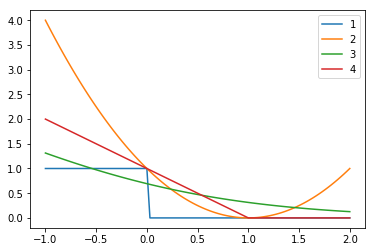

In [57]:
wtx = np.linspace(-1,2,100)
loss = []
for f in wtx:
    loss.append(zerooneloss(f,1))
plt.plot(wtx,loss)
loss = []
for f in wtx:
    loss.append(squaredloss(f,1))
plt.plot(wtx,loss)
loss = []
for f in wtx:
    loss.append(logisticloss(f,1))
plt.plot(wtx,loss)
loss = []
for f in wtx:
    loss.append(hingedloss(f,1))
plt.plot(wtx,loss)
plt.legend(['1','2','3','4'])
#plt.legend(['0-1','squared','logistic','hinged'])

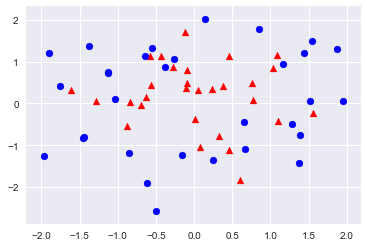

In [3]:
h = .02  # step size in the mesh


ds = make_circles(noise=0.3, factor=0.6, random_state=1)

# preprocess dataset, split into training and test part
X, y = ds
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# just plot the dataset first
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
# Plot the training points
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], c='r',marker='^',s=48)
plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], c='b',marker='o',s=48)


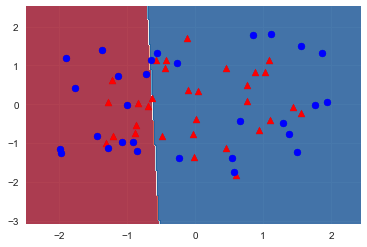

In [4]:
h = .02  # step size in the mesh


ds = make_circles(noise=0.3, factor=0.6, random_state=1)

# preprocess dataset, split into training and test part
X, y = ds
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# just plot the dataset first
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
# Plot the training points
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], c='r',marker='^',s=48)
plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], c='b',marker='o',s=48)


clf = LogisticRegression(C=1e5)
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)

# Plot also the training points
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], c='r',marker='^',s=48)
plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], c='b',marker='o',s=48)    

plt.show()

In [11]:
# non-linear (polynomial) expansion
p = 50
pf = PolynomialFeatures(degree=p,include_bias=False)

pf = pf.fit(X_train)
X_train_p = pf.transform(X_train)

X_test = np.c_[xx.ravel(), yy.ravel()]
pf = pf.fit(X_test)
X_test_p = pf.transform(X_test)

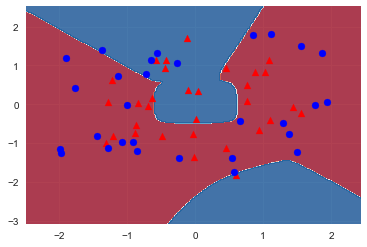

In [12]:
clf = LogisticRegression()
clf.fit(X_train_p, y_train)
mZ = clf.predict(X_test_p)
mZ = mZ.reshape(xx.shape)
plt.contourf(xx, yy, mZ, cmap=cm, alpha=.8)

# Plot also the training points
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], c='r',marker='^',s=48)
plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], c='b',marker='o',s=48)    

plt.show()

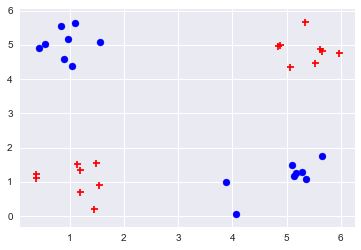

In [13]:
sigma = np.array([[0.2,0],[0,0.2]])
n = 8
mu1 = np.array([1,1])
mu2 = np.array([1,5])
mu3 = np.array([5,1])
mu4 = np.array([5,5])
x11 = np.random.multivariate_normal(mu1,sigma,n)
x15 = np.random.multivariate_normal(mu2,sigma,n)
x51 = np.random.multivariate_normal(mu3,sigma,n)
x55 = np.random.multivariate_normal(mu4,sigma,n)

X = np.vstack([x11,x15,x51,x55])
y = np.ones([4*n,1])
y[n:3*n] = 2
plt.scatter(X[np.where(y == 1)[0],0],X[np.where(y == 1)[0],1],c='r',marker='+')
plt.scatter(X[np.where(y == 2)[0],0],X[np.where(y == 2)[0],1],c='b',marker='o')


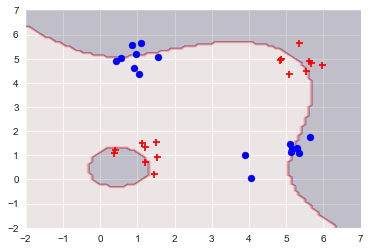

In [14]:
# Use logistic regression with basis function expansion
p = 3
mX = np.zeros((X.shape[0],p))
for i in range(p):
    mX[:,i] = np.sum(X**(i+1),axis=1)

# Learn logistic regression
lr = lm.LogisticRegression()
w = lr.fit(mX,y.ravel())

# evaluate on a grid
x1 = np.linspace(-2,7,100)
x2 = np.linspace(-2,7,100)
xx1,xx2 = np.meshgrid(x1,x2)
Xstar = np.zeros((x1.shape[0]*x2.shape[0],2))
Xstar[:,0] = xx1.ravel()
Xstar[:,1] = xx2.ravel()
mXstar = np.zeros((Xstar.shape[0],p))
for i in range(p):
    mXstar[:,i] = np.sum(Xstar**(i+1),axis=1)
ystar = lr.predict(mXstar)

# visualize the result
plt.contourf(x1,x2,ystar.reshape((x1.shape[0],x2.shape[0])),alpha=0.2)
plt.scatter(X[np.where(y == 1)[0],0],X[np.where(y == 1)[0],1],c='r',marker='+')
plt.scatter(X[np.where(y == 2)[0],0],X[np.where(y == 2)[0],1],c='b',marker='o')

## Dealing with radial data

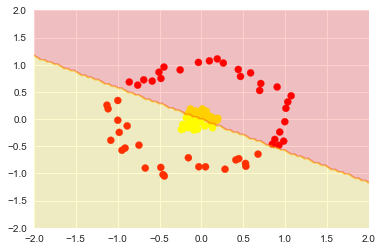

In [16]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1)
lr = lm.LogisticRegression()
w = lr.fit(X,y.ravel())

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
# evaluate on a grid
x1 = np.linspace(-2,2,100)
x2 = np.linspace(-2,2,100)
xx1,xx2 = np.meshgrid(x1,x2)
Xstar = np.zeros((x1.shape[0]*x2.shape[0],2))
Xstar[:,0] = xx1.ravel()
Xstar[:,1] = xx2.ravel()
ystar = lr.predict(Xstar)

# visualize the result
plt.contourf(x1,x2,ystar.reshape((x1.shape[0],x2.shape[0])),cmap='autumn',alpha=0.2)


In [11]:
r = np.exp(-(X ** 2).sum(1))

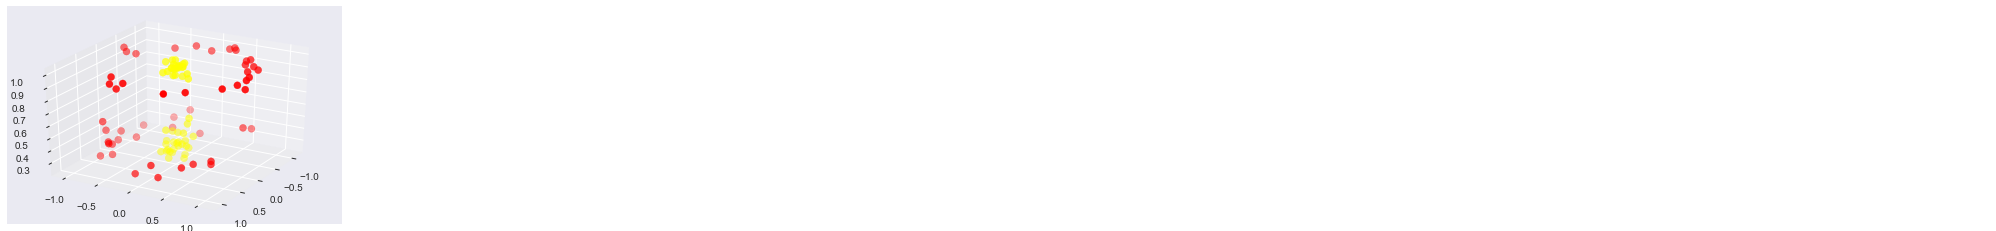

In [22]:
ax = plt.subplot(projection='3d')
ax.view_init(elev=30, azim=30)
ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')

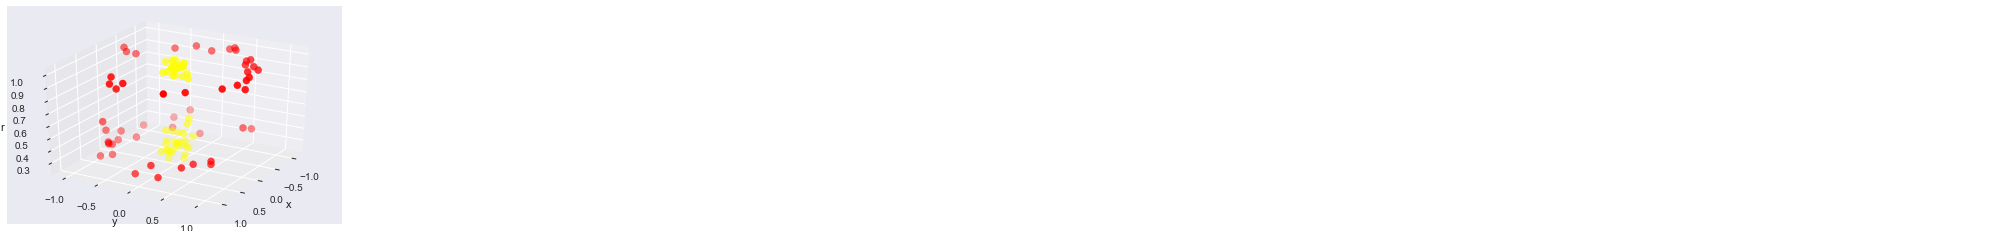

In [18]:
from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30, X=X, y=y,r=r):
    
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')
plot_3D(X=X,y=y,r=r)


In [3]:
x = np.array([1,4,2,3,8])
x = x[:,np.newaxis]
y = np.array([4,7,6,3,8])
y = y[:,np.newaxis]

In [10]:
w = np.linalg.inv(np.matmul(x.T,x))*np.matmul(x.T,y)

In [16]:
w

array([[1.24468085]])

In [15]:
np.sqrt(np.mean(np.square(np.matmul(x,w) - y)))

2.382114204883213